# Blog Post: Logistic Regression

In [74]:
%load_ext autoreload
%autoreload 2
from LogisticRegression import LogisticRegression, GradientDescentOptimizer
import torch
from matplotlib import pyplot as plt 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points, p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    return X, y

X, y = classification_data(noise = 0.5)

w = torch.linspace(-1, 1, X.shape[1])
w_prev = torch.linspace(-1, 1, X.shape[1])

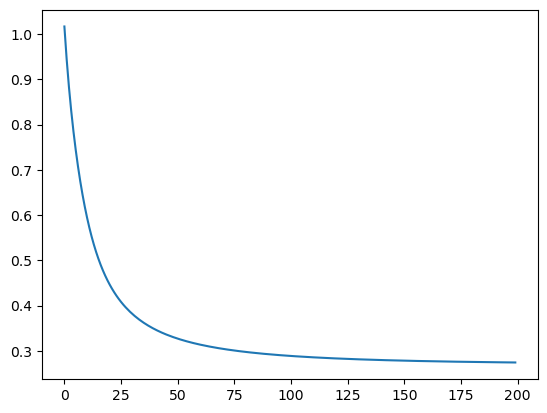

In [210]:
# vanilla gradient descent

LR = LogisticRegression(w)
opt = GradientDescentOptimizer(LR, w, w_prev)

losses = []

for _ in range(200):
    losses.append(LR.loss(X, y))
    opt.step(X, y, alpha = 0.5, beta = 0)

plt.plot(losses)

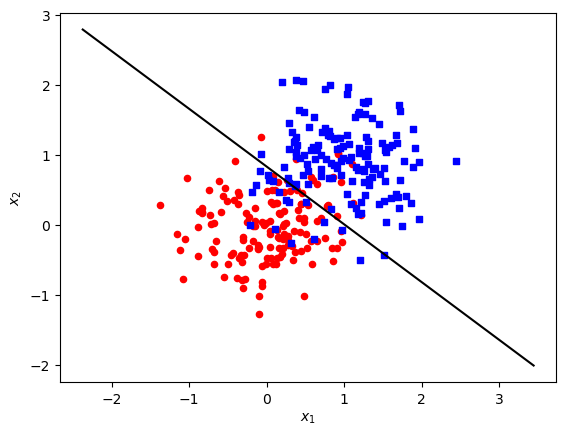

In [211]:
def plot_data_and_boundary(X, y, w, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Plot the data
    targets = [0, 1]
    markers = ["o", ","]
    colors = ["red", "blue"]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = colors[i], cmap = "BrBG", marker = markers[i])

    # Draw the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_values = torch.linspace(x_min, x_max, 100)
    y_values = -(w[0]*x_values + w[2])/w[1]
    ax.plot(x_values, y_values, color='black')

    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    plt.show()

plot_data_and_boundary(X, y, LR.w)

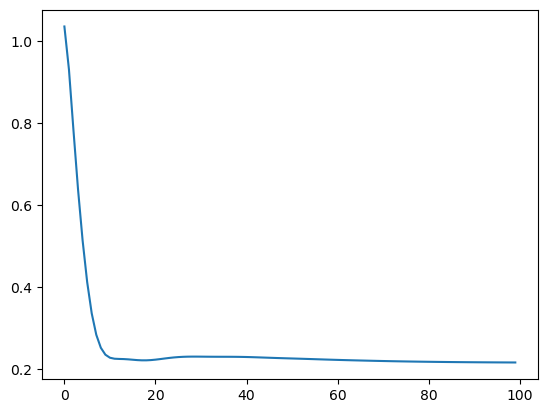

In [208]:
# momentum

X, y = classification_data(noise = 0.5)
w = torch.linspace(-1, 1, X.shape[1])
w_prev = torch.linspace(-1, 1, X.shape[1])

LR = LogisticRegression(w)
opt = GradientDescentOptimizer(LR, w, w_prev)

losses = []

for _ in range(100):
    losses.append(LR.loss(X, y))
    opt.step(X, y, alpha = 0.7, beta = 0.9)

plt.plot(losses)

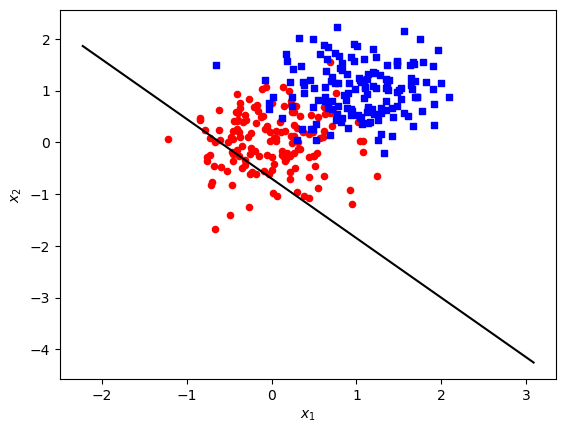

In [204]:
plot_data_and_boundary(X, y, LR.w)

(0.0, 4.0)

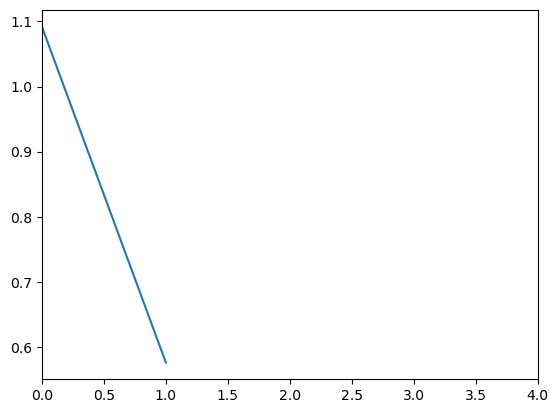

In [205]:
# overfitting

X_train, y_train = classification_data(n_points = 50, p_dims = 100)
X_test, y_test = classification_data(n_points = 50, p_dims = 100)

w = torch.linspace(-1, 1, X_train.shape[1])
w_prev = torch.linspace(-1, 1, X_train.shape[1])

LR = LogisticRegression(w)
opt = GradientDescentOptimizer(LR, w, w_prev)

losses = []

for _ in range(100):
    losses.append(LR.loss(X_train, y_train))
    opt.step(X_train, y_train, alpha = 0.5, beta = 0.2)

plt.plot(losses)
plt.xlim(0, 4)

In [206]:
def accuracy(y_pred, y_true):
    correct = (y_pred == y_true).mean()
    total = y_true.shape[0]
    print(correct)
    return correct / total

In [207]:
# Predict the labels
y_pred = LR.predict(X_train)

# Calculate the accuracy
acc = accuracy(y_pred, y_train)
print(f'Accuracy: {acc}')

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Bool

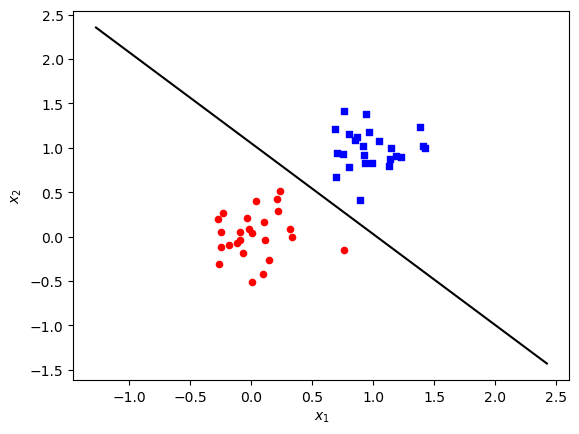

In [ ]:
plot_data_and_boundary(X_train, y_train, LR.w)

In [ ]:
LR = LogisticRegression(w)
opt = GradientDescentOptimizer(LR, w, w_prev)

losses = []

for _ in range(100):
    losses.append(LR.loss(X_test, y_test))
    opt.step(X_test, y_test, alpha = 0.2, beta = 0.5)

plt.plot(losses)

RuntimeError: size mismatch, got input (50), mat (50x101), vec (3)